<a href="https://colab.research.google.com/github/muntakim1/data-science/blob/main/ShopCampaing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('marketing_campaign.csv',delimiter=";")

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

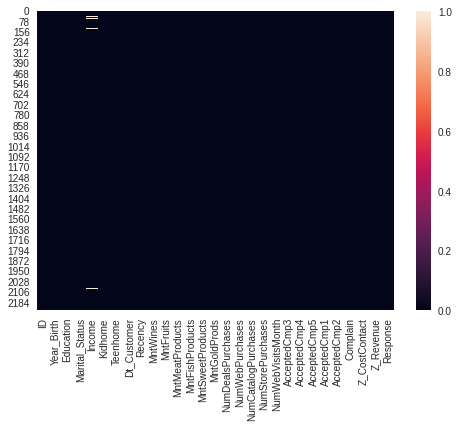

In [ ]:
sns.heatmap(df.isna())

In [ ]:
df.Income.isna().count()

2240

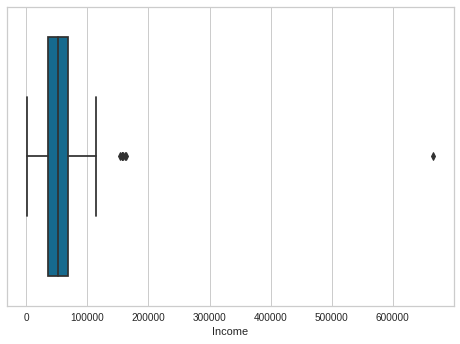

In [ ]:
sns.boxplot(df.Income)

In [ ]:
df.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [ ]:
df.Income.fillna(df.Income.median(),inplace=True)

In [ ]:
df.Income.isna().count()

2240

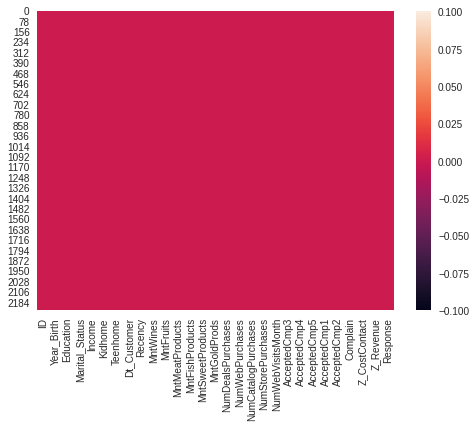

In [ ]:
sns.heatmap(df.isna())

In [ ]:
df.isna().count()

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
Income                 2240
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Complain               2240
Z_CostContact          2240
Z_Revenue              2240
Response               2240
dtype: int64

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df['total_spending']=df["MntWines"] + df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df['total_visits']=df["NumWebPurchases"] + df["NumStorePurchases"]+df["NumDealsPurchases"] + df["NumCatalogPurchases"]

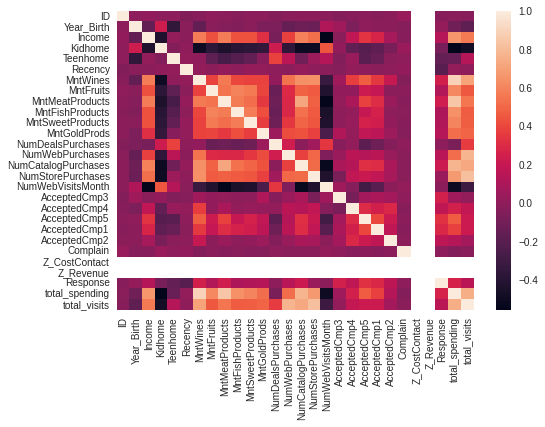

In [ ]:
sns.heatmap(df.corr())

In [ ]:
px.pie(df,'Education','Income', hole=.3,color_discrete_sequence=px.colors.sequential.RdBu)

In [ ]:
px.pie(df,'Marital_Status','Income', hole=.3,color_discrete_sequence=px.colors.sequential.Magma)

In [ ]:
df_1=df.groupby(['Income'])['total_spending','total_visits'].sum().reset_index()

In [ ]:
df_1.columns=['income','spending','seniority']

In [ ]:
df_1.sort_values('seniority',ascending=False)

,income,spending,seniority
974,51381.5,11709,315
11,7500.0,740,104
1452,67445.0,3522,96
1724,77766.0,3058,68
1332,63841.0,2724,66
...,...,...,...
1973,162397.0,107,1
1967,153924.0,6,0
1968,156924.0,8,0
5,4861.0,6,0


In [ ]:
df_1.sort_values('seniority',ascending=False)

,income,spending,seniority
974,51381.5,11709,315
11,7500.0,740,104
1452,67445.0,3522,96
1724,77766.0,3058,68
1332,63841.0,2724,66
...,...,...,...
1973,162397.0,107,1
1967,153924.0,6,0
1968,156924.0,8,0
5,4861.0,6,0


In [ ]:
!pip install PyCaret markupsafe==2.0.1

In [ ]:
from pycaret.clustering import *

In [ ]:
setup_df=setup(df_1,normalize=True,silent=True)

,Description,Value
0,session_id,3752
1,Original Data,"(1975, 3)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1975, 3)"
9,CPU Jobs,-1


In [ ]:
kmeans =create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5236,1344.3918,0.605,0,0,0


In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=3752, tol=0.0001, verbose=0)


In [ ]:
!pip install autoviz

In [ ]:

evaluate_model(kmeans)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [ ]:
result=assign_model(kmeans)

In [ ]:
def cluster(val):
  if val=='Cluster 0':
    return 0
  elif val=='Cluster 1':
    return 1
  elif val=='Cluster 2':
    return 2
  elif val=='Cluster 3':
    return 3

In [ ]:
result.Cluster=result.Cluster.apply(cluster)

In [ ]:
result

,income,spending,seniority,Cluster
0,1730.0,8,15,2
1,2447.0,1730,43,1
2,3502.0,5,0,2
3,4023.0,9,15,2
4,4428.0,359,25,2
...,...,...,...,...
1970,157243.0,1608,37,0
1971,157733.0,59,2,0
1972,160803.0,1717,44,1
1973,162397.0,107,1,0


In [ ]:
result.groupby('Cluster').describe().T

Cluster                      0              1             2        3
income    count     845.000000      93.000000   1036.000000      1.0
          mean    70630.365680   70553.881720  36297.795367  51381.5
          std     24893.841316   17207.046266  12326.012649      NaN
          min     34445.000000    2447.000000   1730.000000  51381.5
          25%     60896.000000   63693.000000  27210.500000  51381.5
          50%     69674.000000   70179.000000  36588.500000  51381.5
          75%     78331.000000   80124.000000  45149.500000  51381.5
          max    666666.000000  160803.000000  68805.000000  51381.5
spending  count     845.000000      93.000000   1036.000000      1.0
          mean     1136.898225    2502.000000    146.635135  11709.0
          std       456.223169     873.834628    142.334233      NaN
          min         6.000000     740.000000      5.000000  11709.0
          25%       793.000000    1919.000000     45.000000  11709.0
          50%      1084.000000    2356.000000     80.500000  11709.0
          75%      1471.000000    3058.000000    222.250000  11709.0
          max      2352.000000    5050.000000    835.000000  11709.0
seniority count     845.000000      93.000000   1036.000000      1.0
          mean       21.952663      46.021505      9.793436    315.0
          std         5.494300      11.902665      4.865713      NaN
          min         0.000000      25.000000      0.000000    315.0
          25%        18.000000      40.000000      6.000000    315.0
          50%        22.000000      44.000000      9.000000    315.0
          75%        25.000000      52.000000     13.000000    315.0
          max        46.000000     104.000000     32.000000    315.0

In [ ]:
result.Cluster=result.Cluster.replace({0:'Stars',1:'Need attention',2:'High potential',3:'Leaky bucket'})

In [ ]:
px.scatter_3d(result,x='income',y='seniority',z='spending',color='Cluster')

In [ ]:
px.bar(result, x="Cluster", y="spending",color="Cluster")

In [ ]:
from pycaret.classification import *

In [ ]:
classificaiton = setup(df,target='Response')

,Description,Value
0,session_id,986
1,Target,Response
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2240, 31)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best=compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8794,0.8567,0.4005,0.6729,0.4976,0.4347,0.4558,0.850
ridge,Ridge Classifier,0.8775,0.0000,0.3281,0.7108,0.4412,0.3841,0.4229,0.035
lightgbm,Light Gradient Boosting Machine,0.8762,0.8671,0.3665,0.6622,0.4632,0.4019,0.4277,0.158
et,Extra Trees Classifier,0.8749,0.8488,0.2572,0.7360,0.3744,0.3253,0.3825,0.500
lda,Linear Discriminant Analysis,0.8705,0.8657,0.4592,0.5906,0.5121,0.4399,0.4466,0.070
rf,Random Forest Classifier,0.8685,0.8577,0.2112,0.7351,0.3188,0.2721,0.3387,0.686
ada,Ada Boost Classifier,0.8673,0.8351,0.3788,0.5869,0.4539,0.3845,0.3986,0.319
lr,Logistic Regression,0.8500,0.7558,0.1225,0.4855,0.1912,0.1443,0.1853,0.461
dummy,Dummy Classifier,0.8488,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.014
knn,K Neighbors Classifier,0.8309,0.6200,0.0929,0.3133,0.1413,0.0774,0.0962,0.127


In [ ]:
blended=blend_models(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8854,0.0,0.4583,0.6875,0.5500,0.4873,0.5005
1,0.8854,0.0,0.3333,0.8000,0.4706,0.4183,0.4690
2,0.8917,0.0,0.4583,0.7333,0.5641,0.5060,0.5243
3,0.8790,0.0,0.2917,0.7778,0.4242,0.3719,0.4282
4,0.9108,0.0,0.5000,0.8571,0.6316,0.5848,0.6124
5,0.8726,0.0,0.4167,0.6250,0.5000,0.4303,0.4420
6,0.8726,0.0,0.3333,0.6667,0.4444,0.3814,0.4107
7,0.8462,0.0,0.1739,0.4444,0.2500,0.1822,0.2073
8,0.9038,0.0,0.4348,0.8333,0.5714,0.5232,0.5585


In [ ]:
stacked_model=stack_models(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8535,0.7202,0.1667,0.5714,0.2581,0.2030,0.2513
1,0.8726,0.8283,0.2500,0.7500,0.3750,0.3233,0.3845
2,0.8662,0.7641,0.2083,0.7143,0.3226,0.2723,0.3370
3,0.8535,0.8396,0.1250,0.6000,0.2069,0.1628,0.2254
4,0.8471,0.8042,0.1250,0.5000,0.2000,0.1479,0.1923
5,0.8344,0.6867,0.0833,0.3333,0.1333,0.0769,0.1000
6,0.8344,0.7917,0.1250,0.3750,0.1875,0.1203,0.1430
7,0.8462,0.7372,0.0435,0.3333,0.0769,0.0444,0.0734
8,0.8846,0.8280,0.3043,0.7778,0.4375,0.3866,0.4399


In [ ]:
tuned_stacked=tune_model(stacked_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8854,0.7619,0.3750,0.7500,0.5000,0.4433,0.4774
1,0.8726,0.8584,0.2500,0.7500,0.3750,0.3233,0.3845
2,0.8662,0.7635,0.2083,0.7143,0.3226,0.2723,0.3370
3,0.8471,0.8399,0.0833,0.5000,0.1429,0.1037,0.1560
4,0.8471,0.7610,0.1250,0.5000,0.2000,0.1479,0.1923
5,0.8280,0.6873,0.0833,0.2857,0.1290,0.0644,0.0797
6,0.8344,0.7923,0.1250,0.3750,0.1875,0.1203,0.1430
7,0.8462,0.7012,0.0870,0.4000,0.1429,0.0952,0.1296
8,0.8846,0.8333,0.3043,0.7778,0.4375,0.3866,0.4399


In [ ]:
evaluate_model(tuned_stacked)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
tuned_blended=tune_model(blended,fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8762,0.0,0.4375,0.6364,0.5185,0.4503,0.4607
1,0.8857,0.0,0.3750,0.7500,0.5000,0.4435,0.4775
2,0.8762,0.0,0.3125,0.7143,0.4348,0.3770,0.4179
3,0.8762,0.0,0.3125,0.7143,0.4348,0.3770,0.4179
4,0.8857,0.0,0.5000,0.6667,0.5714,0.5070,0.5140
5,0.8667,0.0,0.2500,0.6667,0.3636,0.3059,0.3523
6,0.9048,0.0,0.5000,0.8000,0.6154,0.5643,0.5846
7,0.8750,0.0,0.4667,0.5833,0.5185,0.4477,0.4514
8,0.8846,0.0,0.4667,0.6364,0.5385,0.4743,0.4818


In [ ]:
evaluate_model(tuned_blended)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…